In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
 kashti = sns.load_dataset("titanic")
 kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
kashti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
kashti.dropna(subset=['age'], axis=0, inplace=True)
kashti.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df = kashti[["sex", "age", "fare"]]
df.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


In [17]:
# t test to compare the age of male vs female
#1 import libraries
from scipy.stats import ttest_ind
#2 subset of male vs female
df_male = df[df['sex']=="male"]
df_female= df[df['sex']== "female"]
#3 t test (unpaired, two sample)
ttest_ind(df_male['age'],df_female['age'])
# conditional loop, different or not
stat, p_value = ttest_ind(df_male['age'], df_female['age'])
print("stat=", stat, "p=", p_value)
if p_value > 0.05:
    print("There is no significance difference")
else:
    print("There is a significant different")
    

stat= 2.499206354920835 p= 0.012671296797013709
There is a significant different


In [18]:
# One sample ttest
#1 import libraries
from scipy.stats import ttest_1samp
#2 subset of male vs female
df_male = df[df['sex']=="male"]
df_female= df[df['sex']== "female"]
#3 t test (unpaired, two sample)
ttest_1samp(df_male['age'],36)
# conditional loop, different or not
stat, p_value = ttest_1samp(df_male['age'],36)
print("stat=", stat, "p=", p_value)
if p_value > 0.05:
    print("There is no significance difference")
else:
    print("There is a significant different")

stat= -7.646511009251602 p= 1.2523613407424712e-13
There is a significant different


#### Normal Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

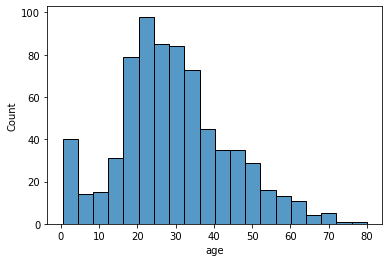

In [19]:
sns.histplot(kashti['age'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

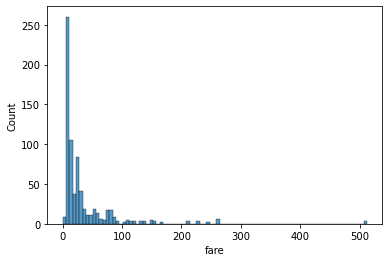

In [20]:
sns.histplot(kashti['fare'])

In [21]:
# shapiro wilk test
from scipy.stats import shapiro
stat, p = shapiro(kashti['age'])
if p > 0.05:
    print("Probably Guassian")
else:
    print("probably not Guassian")

probably not Guassian
